In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import numpy as np
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from random import random
from math import pi, cos, sin
from sklearn.datasets import make_swiss_roll
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

plt.rcParams['figure.figsize'] = [20, 10]

2025-02-19 00:18:59.917724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Generate isomap embedding for dataset in 2D

def isomap_embed(X, name, color): 
    isomp = manifold.Isomap(n_neighbors=10, n_components=2)
    Y = isomp.fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    fig.suptitle("Isomap embedding of " + name + " data", fontsize=16)
    return Y

# Y = isomap_embed(sroll)

In [4]:
# Generating isomap graph
def isomap_graph(X):
    isomp = manifold.Isomap(n_neighbors=10, n_components=2)
    Y = isomp.fit_transform(X)
    dist, ind = isomp.nbrs_.kneighbors(X)
    
    pos = {}
    G = nx.Graph()
    
    for i in range(X.shape[0]):
        pos[i] = X[i]
        for j in range(ind.shape[1]):
            G.add_edge(i, ind[i,j])
    # Plotting isomap graph

    edges = np.array([(X[u], X[v]) for u, v in G.edges()])
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color)
    
    for e in range(edges.shape[0]):
        ax.plot(*edges[e].T, color="tab:gray")
    
    ax.view_init(4, -72)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.zaxis.set_major_formatter(NullFormatter())

# isomap_graph(sroll)

In [5]:
# Generate and Plot Laplacian Eigenmap embedding for dataset in 2D
def lap_eigen(X, name, color):
    le = manifold.SpectralEmbedding(n_neighbors=10, n_components=2)
    Y = le.fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(Y[:, 0], Y[:, 1], c=color) 
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    fig.suptitle("Laplacian Eigenmap embedding of " + name + " data", fontsize=16)
    return Y

# Y = lap_eigen(sroll)

In [6]:
# Generate and plot autoencoder embedding for dataset in 2D

def autoencoder(X, name, color):
    # Define autoencoder model
    input_dim = X.shape[1]  # 3D input
    encoding_dim = 2        # 2D output
    
    # Input layer
    input_layer = Input(shape=(input_dim,))
    # Encoder layer
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='linear')(encoded)
    
    # Decoder layer
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='linear')(decoded)
    
    # Autoencoder model
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)  # The encoder part only
    
    # Compile and train the autoencoder
    autoencoder.compile(optimizer=Adam(), loss='mse')
    autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, verbose=0)
    
    # Get the 2D embedding from the encoder
    X_encoded = encoder.predict(X)
    print(X_encoded.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(X_encoded[:, 0], X_encoded[:, 1], c=color) 
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    fig.suptitle("Autoencoder embedding of " + name + " data", fontsize=16)
    
    return X_encoded

In [7]:
# Generate and plot t-SNE embedding for dataset in 2D

def tSNE(X, name, color):
    tsne = manifold.TSNE(n_components=2, random_state=0)
    Y = tsne.fit_transform(X)

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(Y[:, 0], Y[:, 1], c=color) 
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    fig.suptitle("t-SNE embedding of " + name + " data", fontsize=16)
    return Y

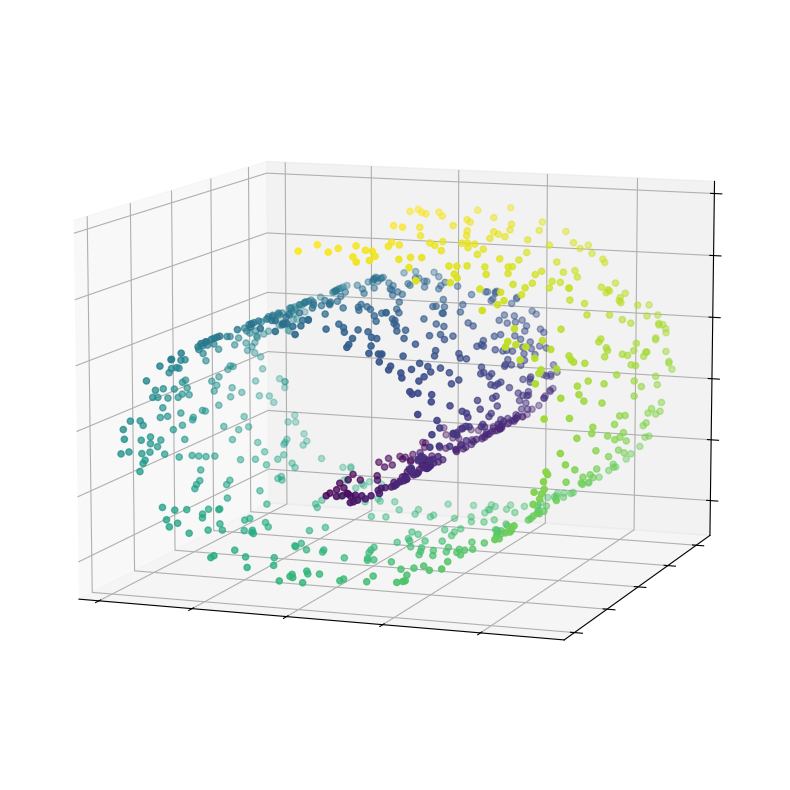

In [8]:
# Generate swiss roll dataset

n_points = 1000
sroll, scolor = datasets.make_swiss_roll(n_points, random_state=0)

# Plot swiss roll
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sroll[:, 0], sroll[:, 1], sroll[:, 2], c=scolor)
ax.view_init(10, -70)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())

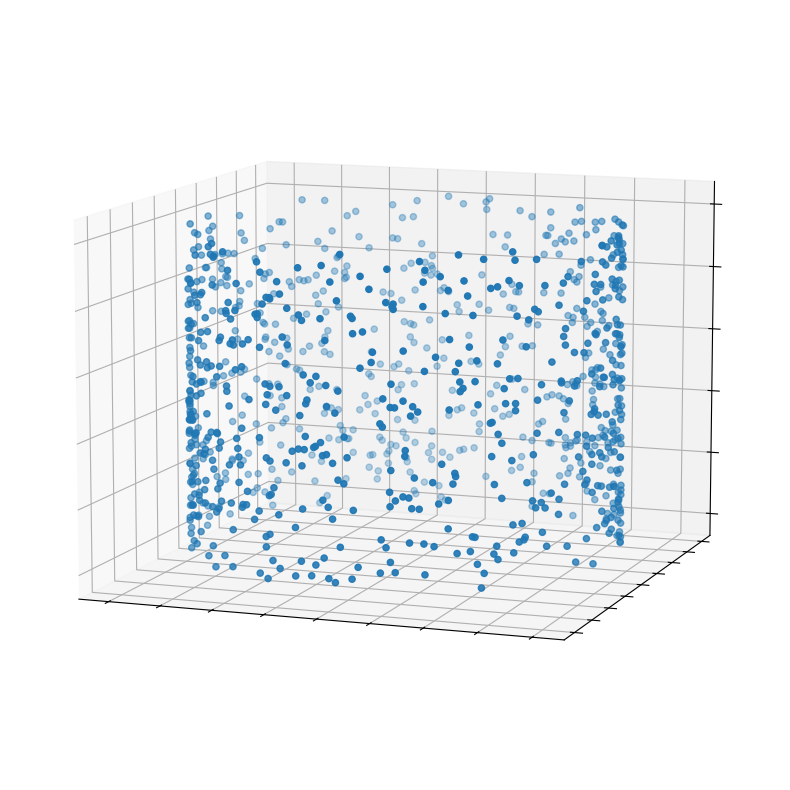

In [9]:
# Generate cylinder dataset
def point_cylinder():
     theta = random() * 2 * pi
     return cos(theta), sin(theta), random()

cyl = np.array([point_cylinder() for _ in range(1000)])

# Plot cylinder

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cyl[:, 0], cyl[:, 1], cyl[:, 2])
ax.view_init(10, -70)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.zaxis.set_major_formatter(NullFormatter())

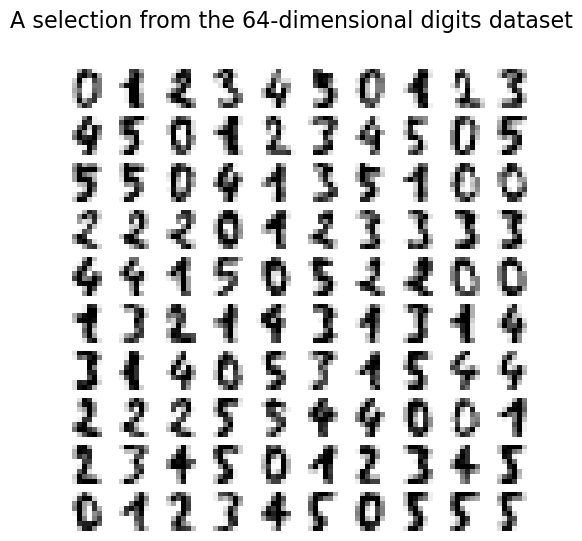

In [10]:
# Load Handwritten Digits dataset
digits = load_digits(n_class=6)
X = digits.data  
y = digits.target  
digits_color = y  # Use the labels as color for the plots

# Preprocess data (normalize to have zero mean and unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_samples, n_features = X.shape
n_neighbors = 30

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1000, 2)


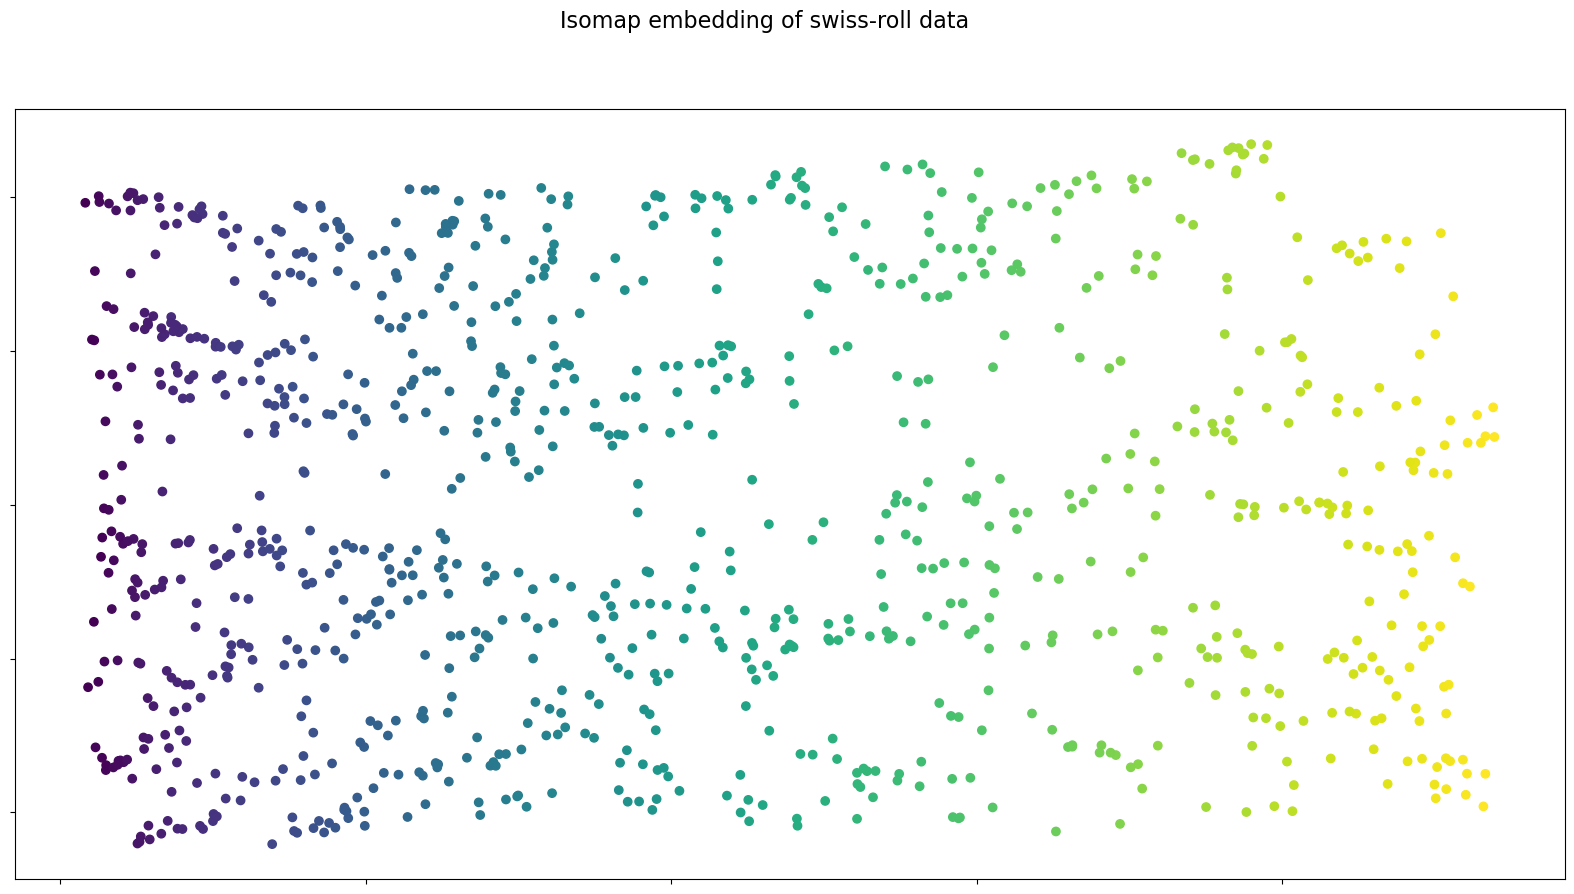

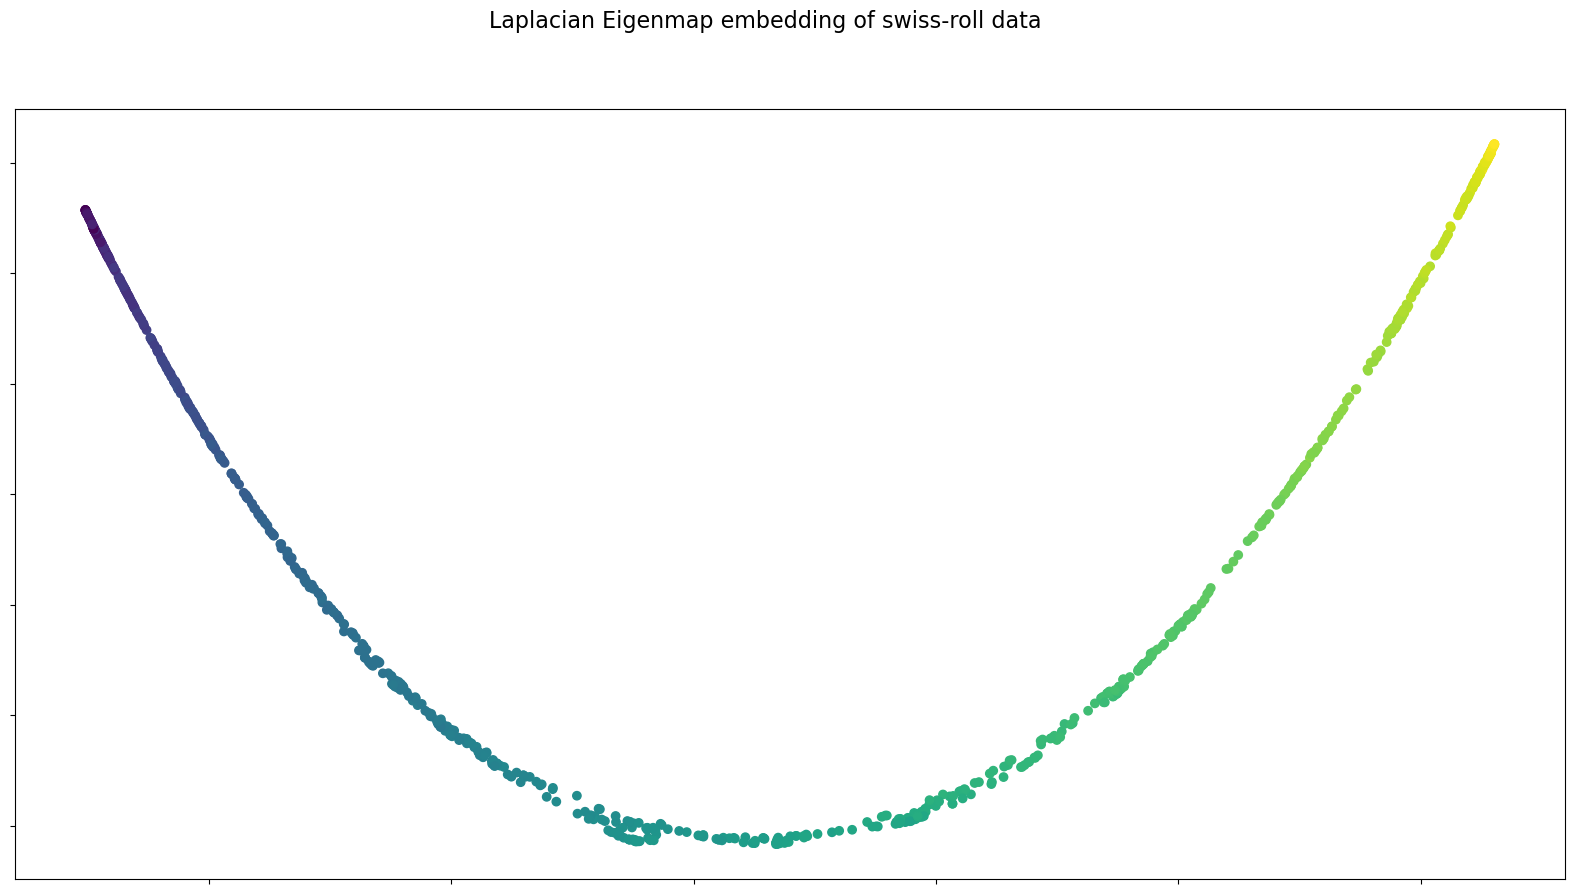

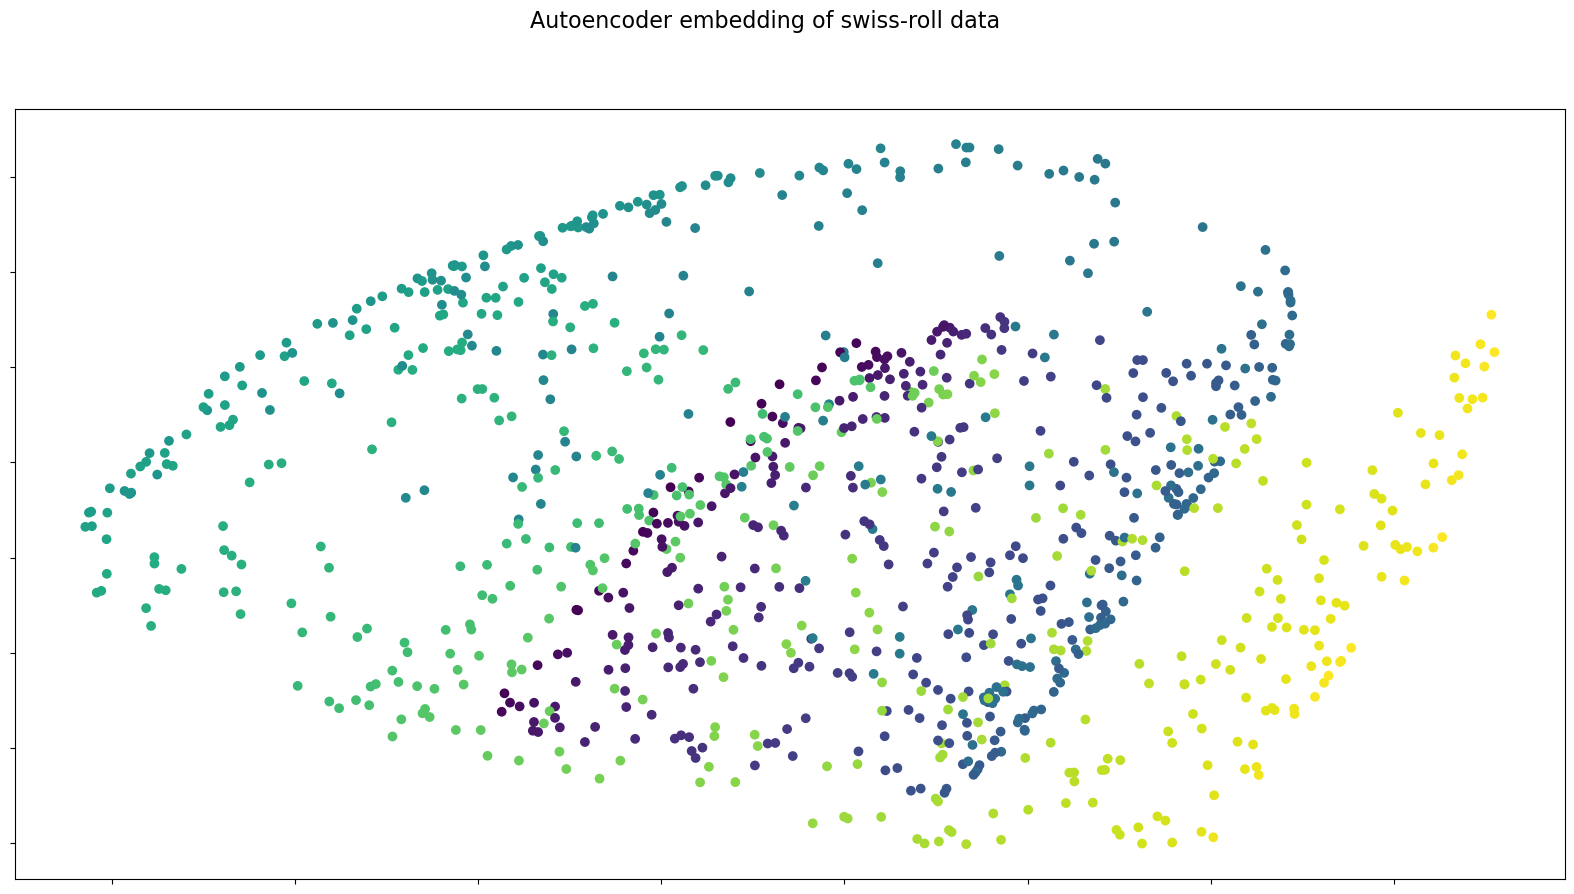

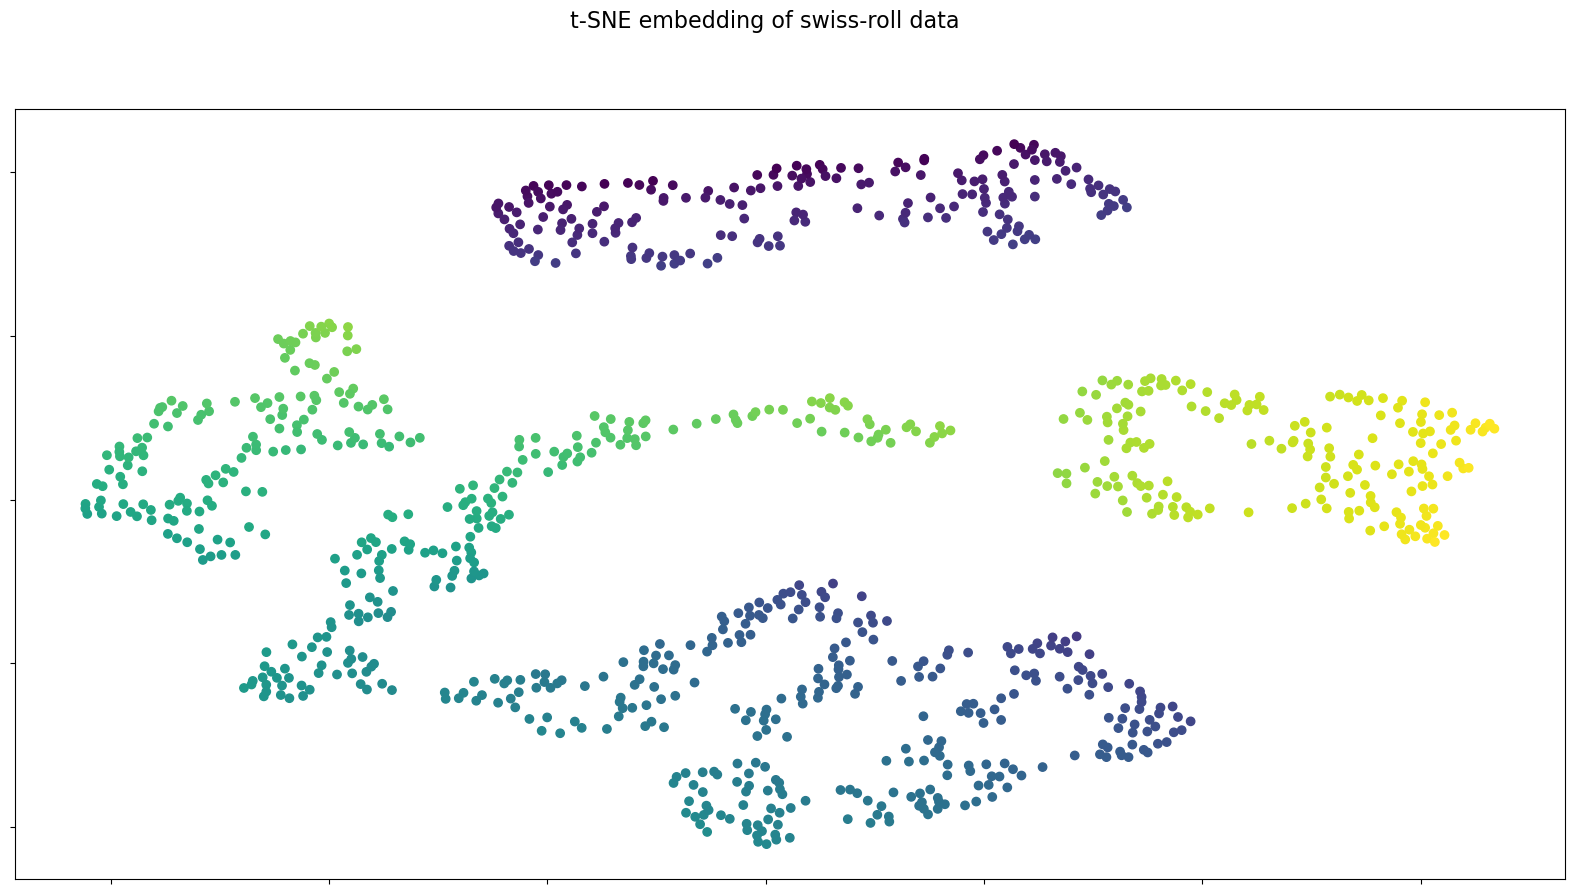

In [11]:
# Compare 2d embeddings for swiss roll
sroll_isomap = isomap_embed(sroll, "swiss-roll", scolor)
sroll_le = lap_eigen(sroll, "swiss-roll", scolor)
sroll_autoencoder = autoencoder(sroll, "swiss-roll", scolor)
sroll_tSNE = tSNE(sroll, "swiss-roll", scolor)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1000, 2)


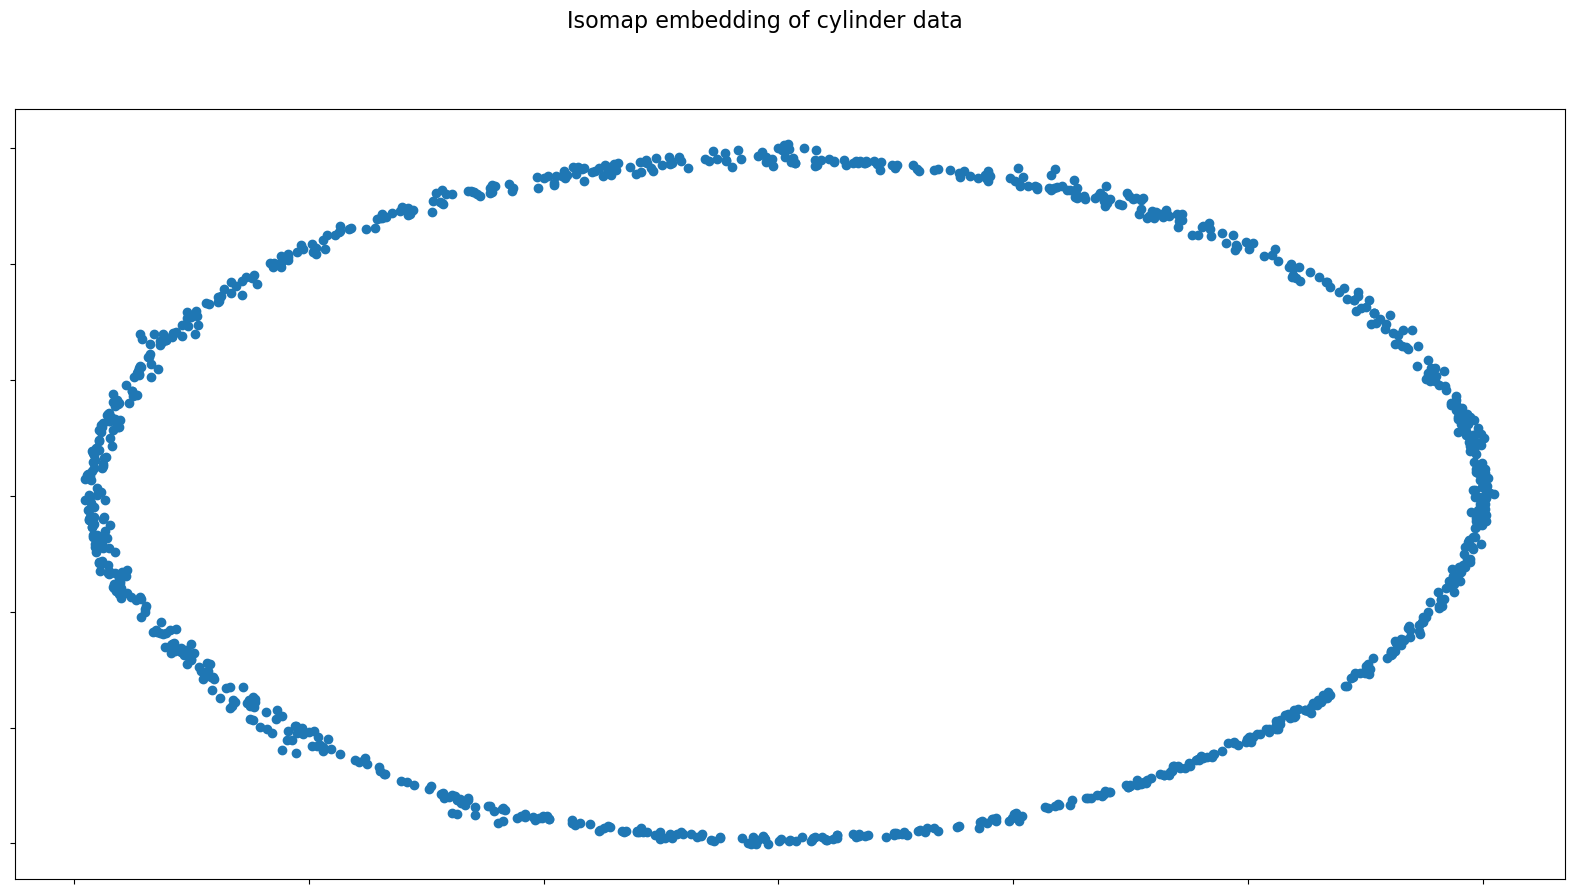

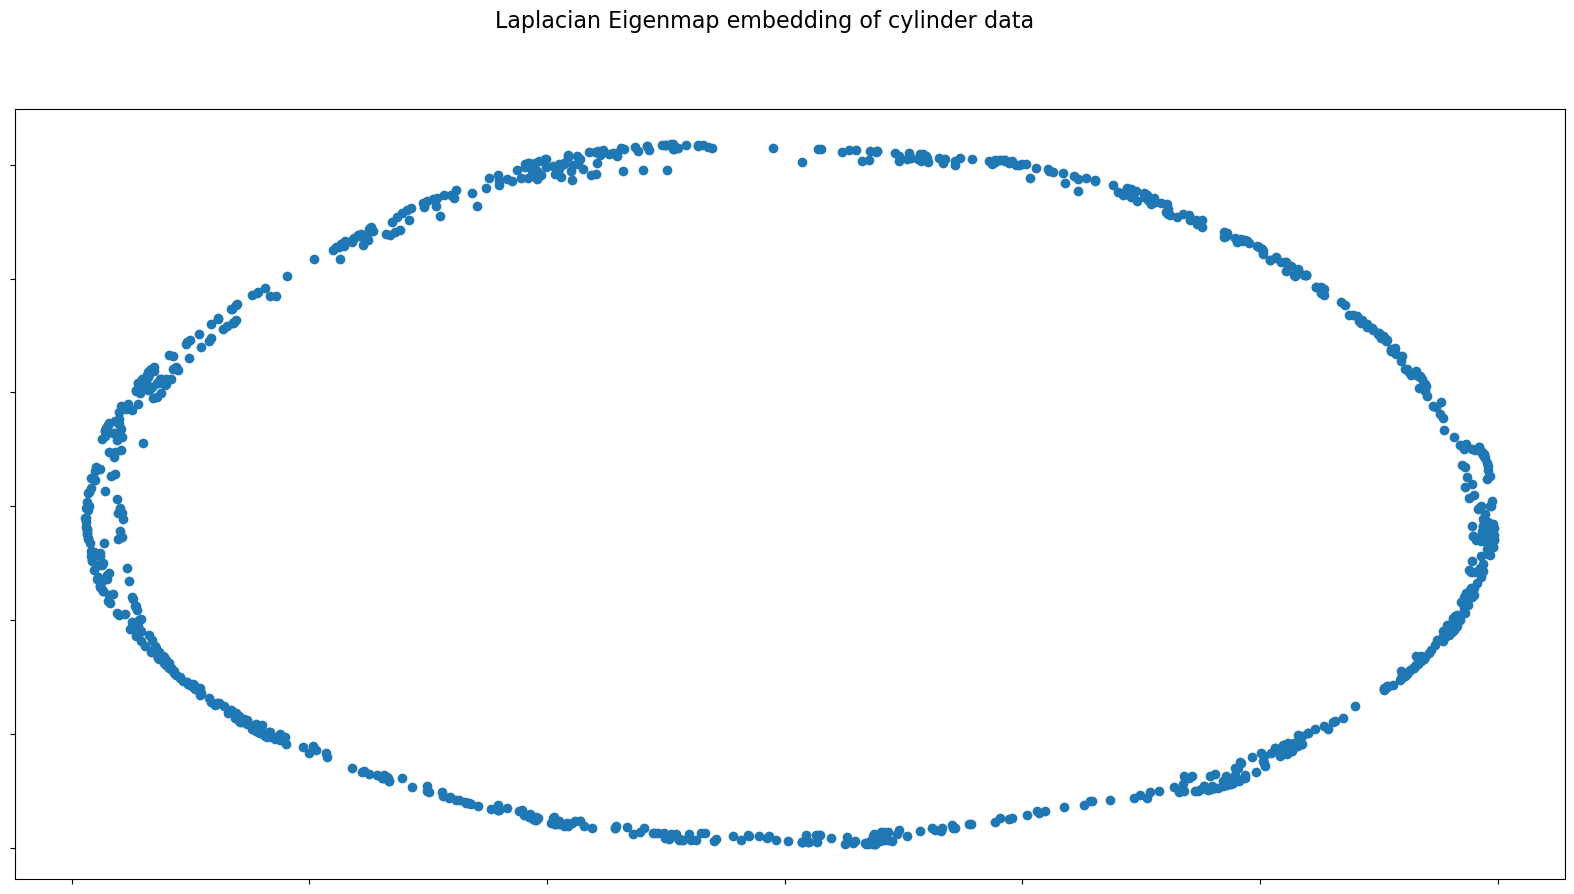

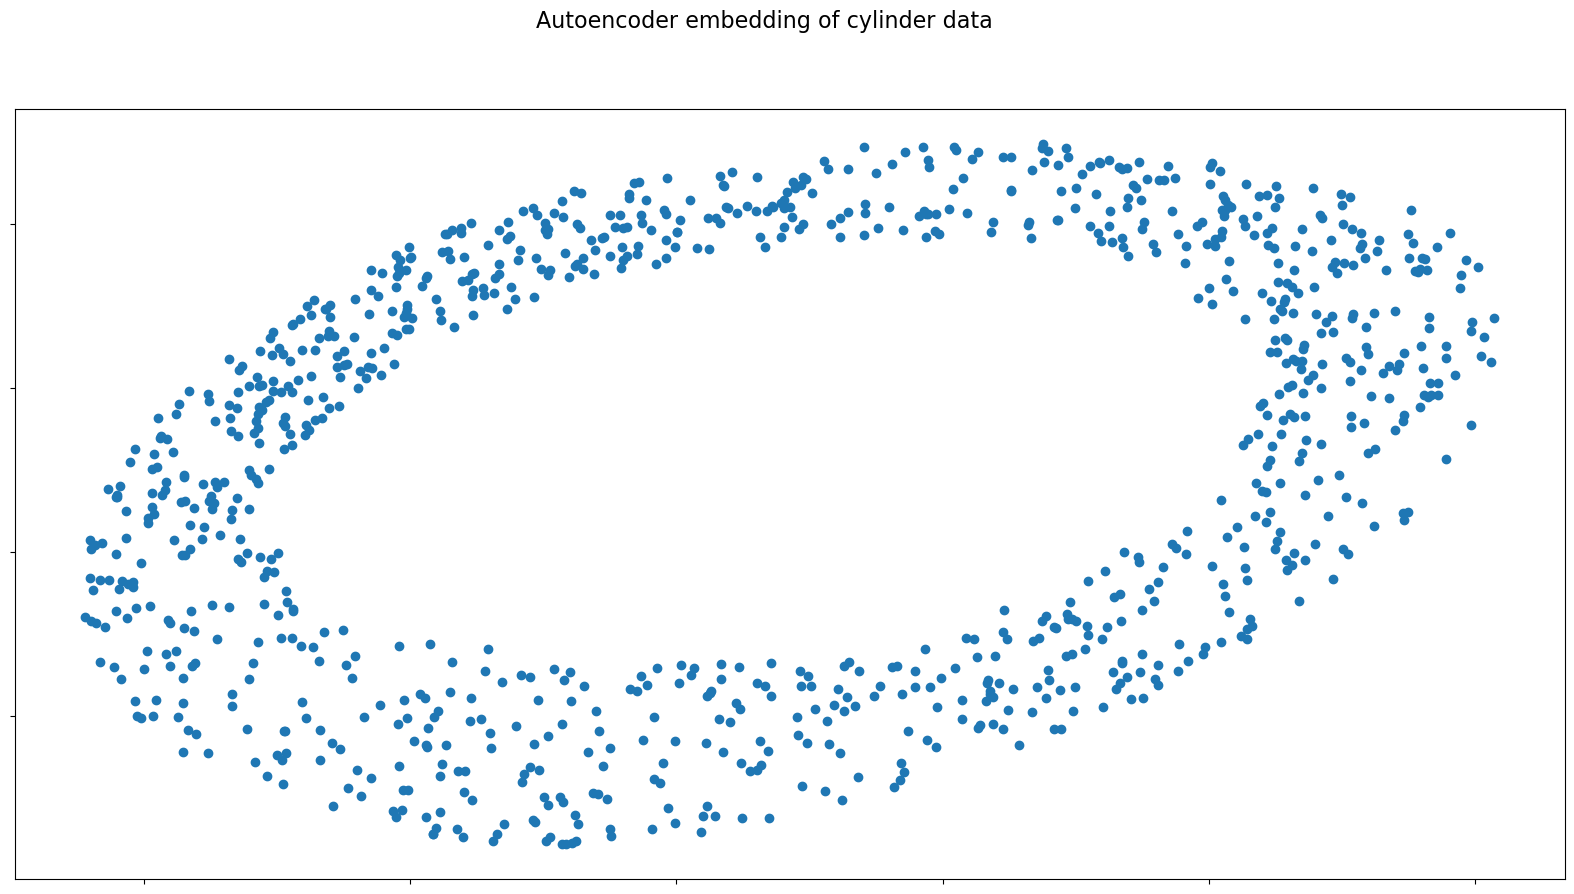

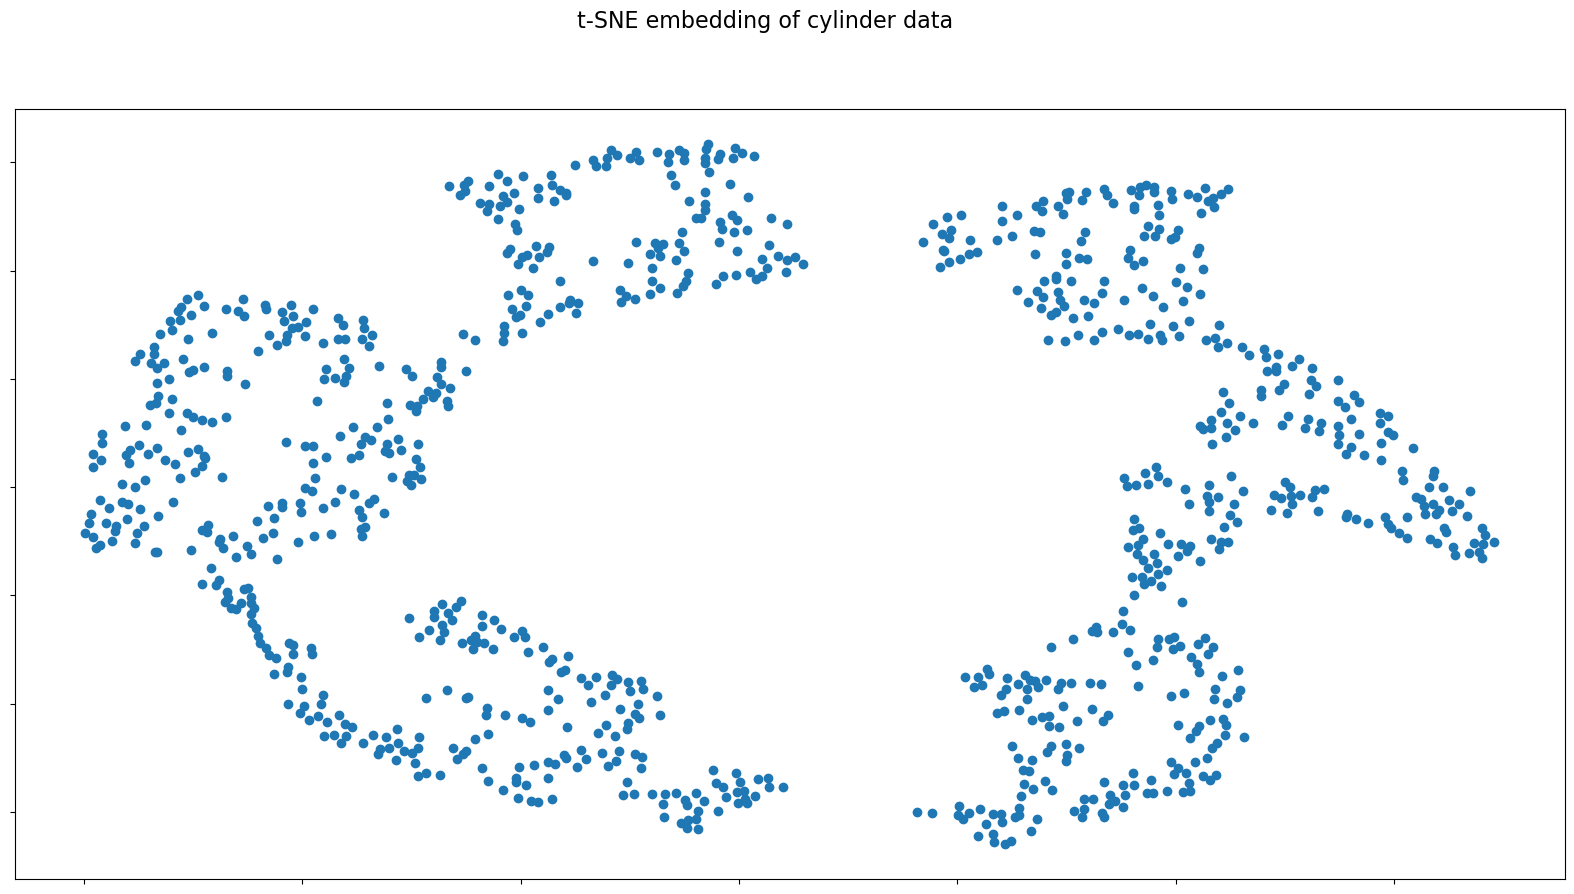

In [12]:
# Compare 2d embeddings for cylinder
cyl_isomap = isomap_embed(cyl, "cylinder", None)
cyl_le = lap_eigen(cyl, "cylinder", None)
cyl_autoencoder = autoencoder(cyl, "cylinder", None)
cyl_tSNE = tSNE(cyl, "cylinder", None)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1083, 2)


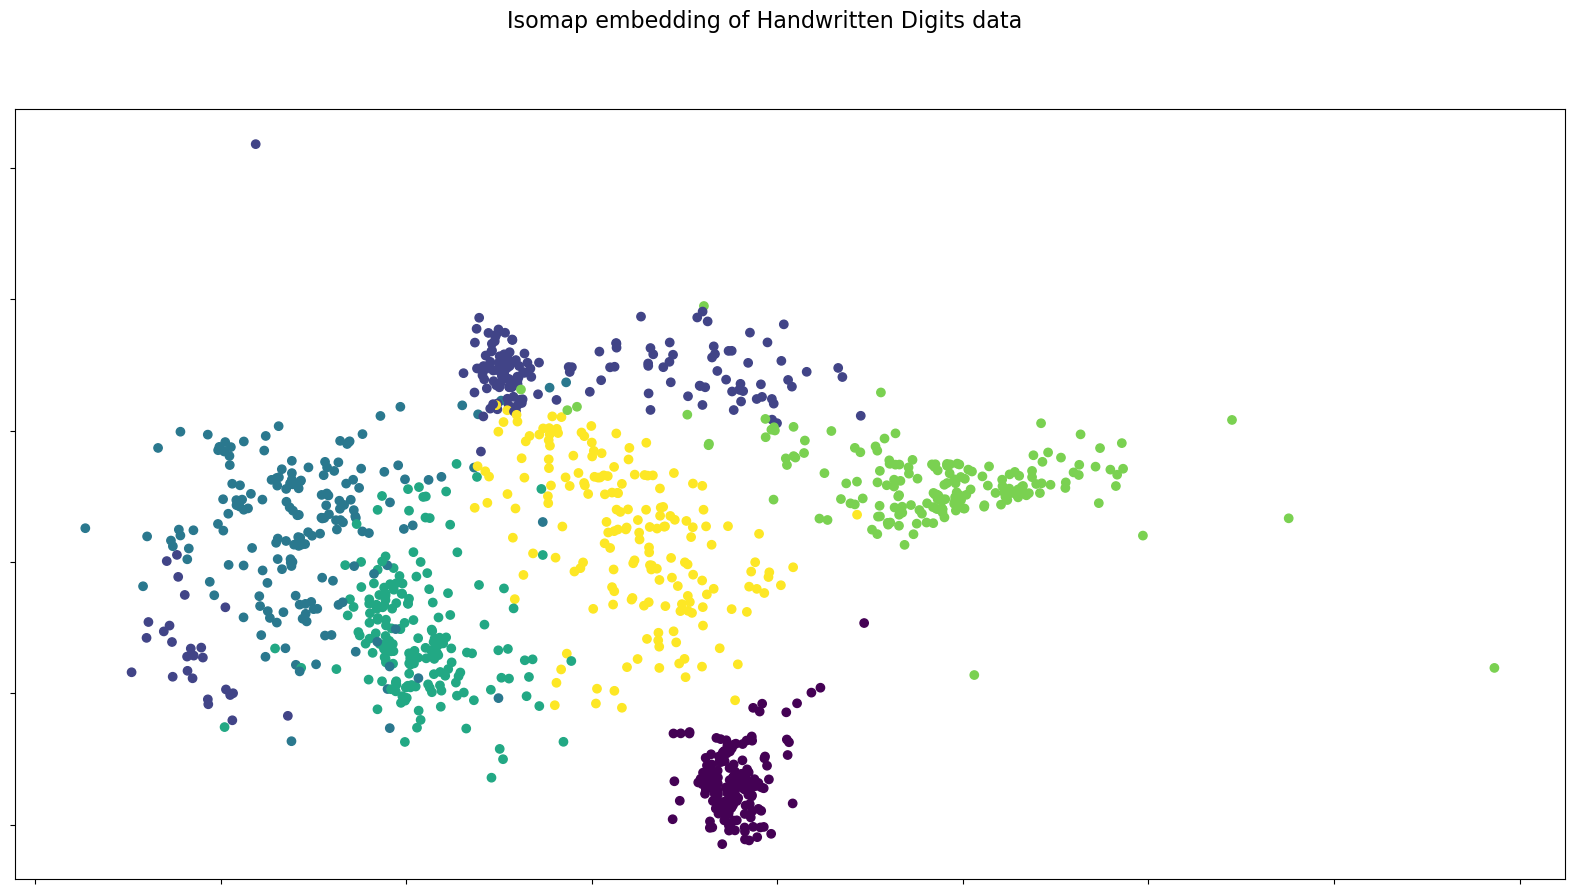

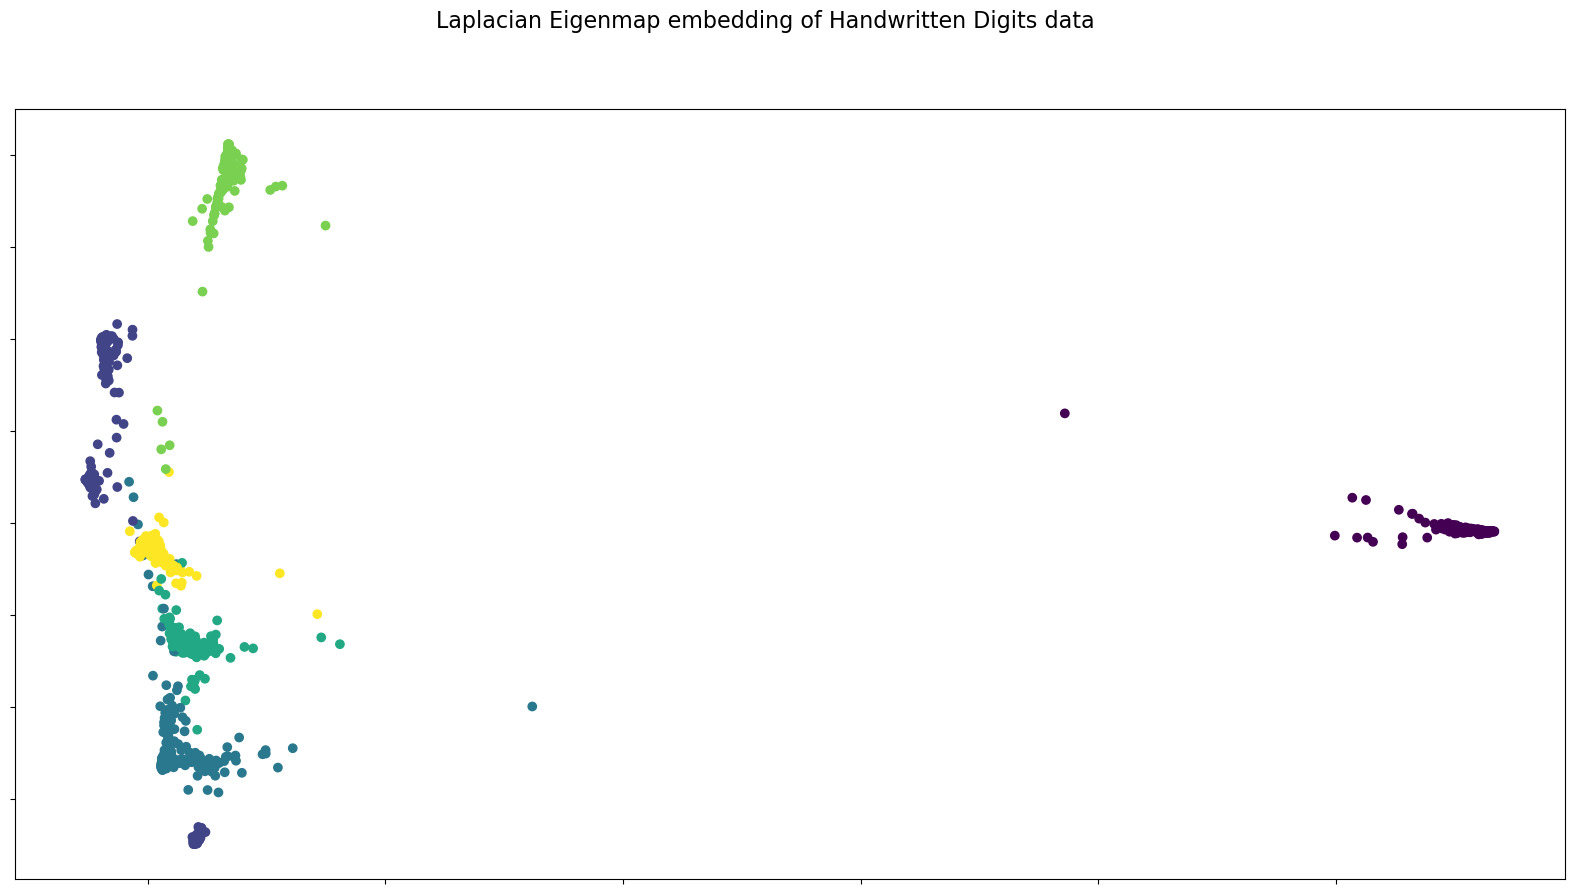

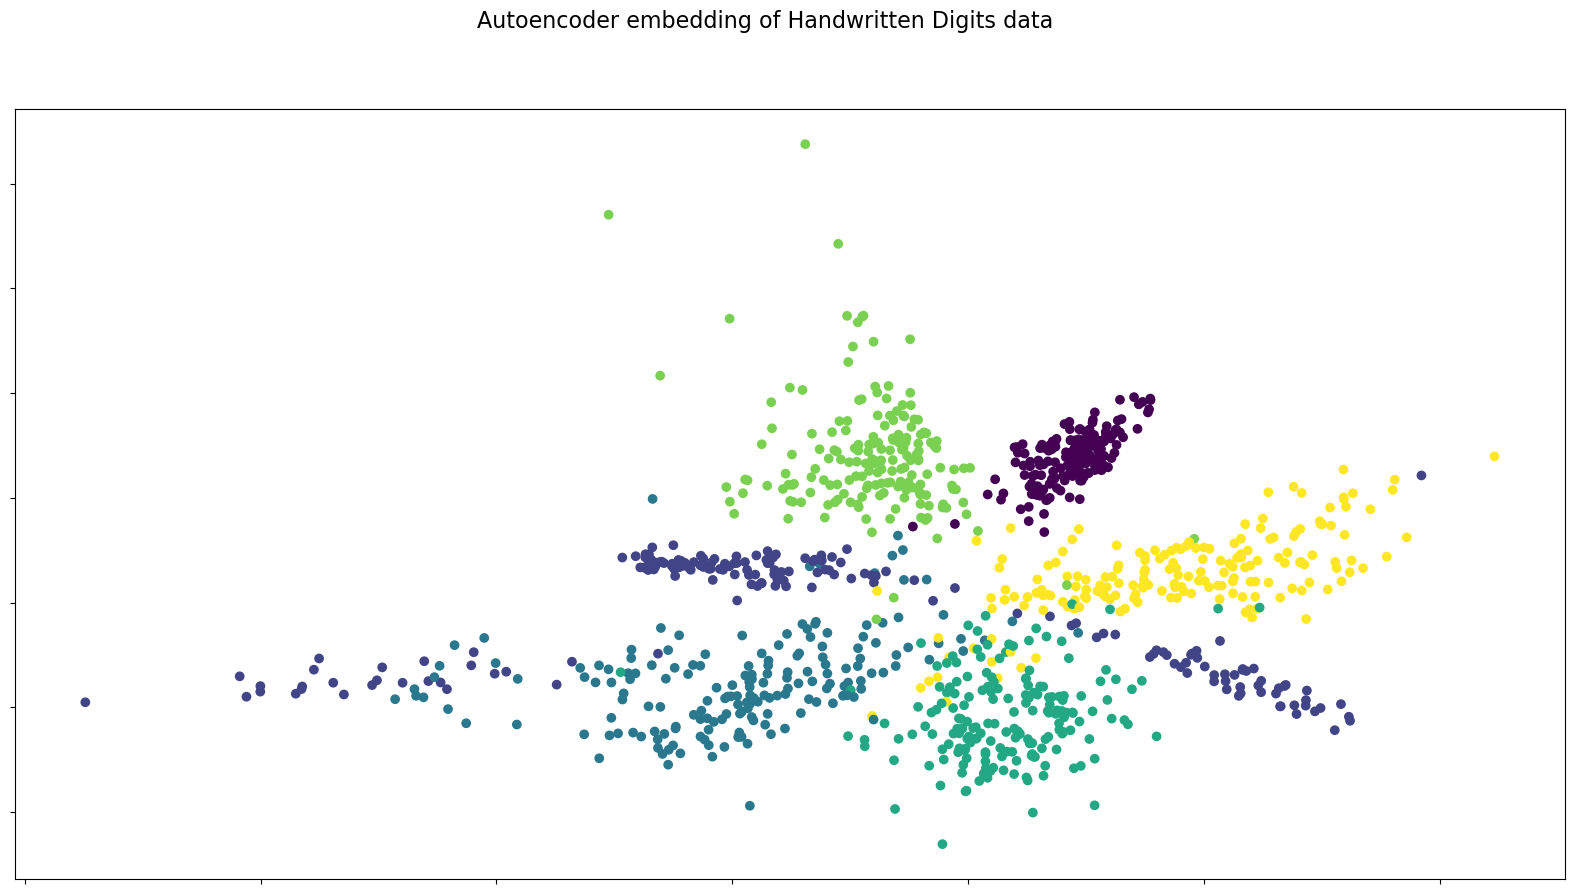

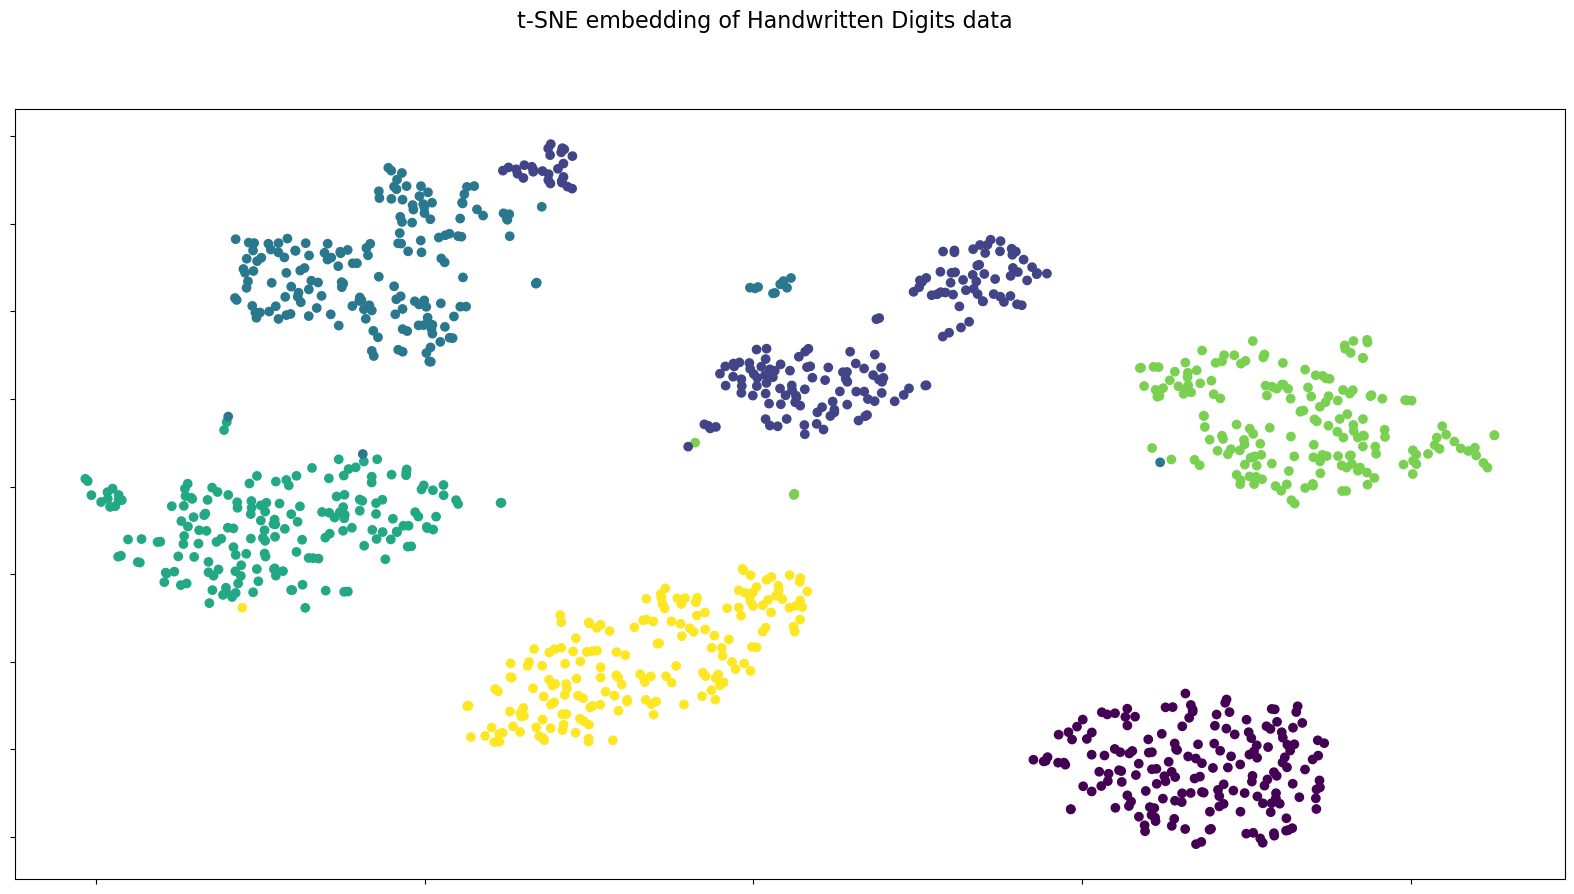

In [13]:
# Compare 2d embeddings for handwritten digits
isomap_result = isomap_embed(X_scaled, "Handwritten Digits", digits_color)
laplacian_result = lap_eigen(X_scaled, "Handwritten Digits", digits_color)
autoencoder_result = autoencoder(X_scaled, "Handwritten Digits", digits_color)
tsne_result = tSNE(X_scaled, "Handwritten Digits",digits_color)